In [ ]:
# 量子ビットを理解する（量子テレポテーション）

In [ ]:
!pip install -U pip
!pip install numpy matplotlib ipython 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches

## 初期状態の設定

In [125]:
#量子bit×3の生成
import dataclasses
@dataclasses.dataclass
class Qbit:
    phi: float # ブロッホ球での|0>からの角度
    shift: float # 位相差

#量子bit0
Q1 = Qbit(math.pi*0.2,math.pi*0.5)
#量子bit1
Q2 = Qbit(math.pi*0,math.pi*0)
#量子bit2
Q3 = Qbit(math.pi*0,math.pi*0)

## 諸元算出

In [25]:
def createBy1bit(q_0:Qbit):
    # 初期の各量子bit列の波の軸
    yo = np.arange(0,2*math.pi,0.01)
    q0 = math.cos(q_0.phi/2) * np.sin(yo)
    q1 = math.sin(q_0.phi/2) * np.sin(yo-q_0.shift)
    return q0,q1

def createBy2bit(q_1:Qbit,q_2:Qbit):
    # 初期の各量子bit列の波の軸
    yo = np.arange(0,2*math.pi,0.01)
    q00 = (math.cos(q_1.phi/2) * math.cos(q_2.phi/2))*np.sin(yo)
    q01 = (math.cos(q_1.phi/2) * math.sin(q_2.phi/2))*np.sin(yo-q_2.shift)
    q10 = (math.sin(q_1.phi/2) * math.cos(q_2.phi/2))*np.sin(yo-q_1.shift)
    q11 = (math.sin(q_1.phi/2) * math.sin(q_2.phi/2))*np.sin(yo- ((q_1.shift+q_2.shift-math.pi*2) if (q_1.shift+q_2.shift >math.pi*2.0) else (q_1.shift+q_2.shift)))
    return q00,q01,q10,q11

## 描画用関数

In [123]:
# 波描画
def set_wave_ax(ax,q,title):
    yo = np.arange(0,2*math.pi,0.01)
    ax.plot(yo,q)
    ax.set_xticks([0, 1.57,3.14, 4.71,6.28], ["0", "1/2π", "π","3/2π","2π"])
    ax.set_ylim(-1.1,1.1)
    ax.set_title(title)
    return ax
    
def draw_8waves(q000,q001,q010,q011,q100,q101,q110,q111):
    fig = plt.figure(figsize=(16,16)) #図のサイズを決定
    ax_000 = fig.add_subplot(4,2,1)
    ax_001 = fig.add_subplot(4,2,2)
    ax_010 = fig.add_subplot(4,2,3)
    ax_011 = fig.add_subplot(4,2,4)
    ax_100 = fig.add_subplot(4,2,5)
    ax_101 = fig.add_subplot(4,2,6)
    ax_110 = fig.add_subplot(4,2,7)
    ax_111 = fig.add_subplot(4,2,8)

    ax_000 = set_wave_ax(ax_000,q000,"|000>")
    ax_001 = set_wave_ax(ax_001,q001,"|001>")
    ax_010 = set_wave_ax(ax_010,q010,"|010>")
    ax_011 = set_wave_ax(ax_011,q011,"|011>")
    ax_100 = set_wave_ax(ax_100,q100,"|100>")
    ax_101 = set_wave_ax(ax_101,q101,"|101>")
    ax_110 = set_wave_ax(ax_110,q110,"|110>")
    ax_111 = set_wave_ax(ax_111,q111,"|111>")

    plt.subplots_adjust(hspace=0.8)

    plt.show()

    return
    
def draw_4waves(q00,q01,q10,q11):
    fig = plt.figure(figsize=(16,10)) #図のサイズを決定
    ax_00 = fig.add_subplot(4,1,1)
    ax_01 = fig.add_subplot(4,1,2)
    ax_10 = fig.add_subplot(4,1,3)
    ax_11 = fig.add_subplot(4,1,4)

    ax_00 = set_wave_ax(ax_00,q00,"|00>")
    ax_01 = set_wave_ax(ax_01,q01,"|01>")
    ax_10 = set_wave_ax(ax_10,q10,"|10>")
    ax_11 = set_wave_ax(ax_11,q11,"|11>")

    plt.subplots_adjust(hspace=0.4)

    plt.show()

    return

def draw_2waves(q0,q1):
    fig = plt.figure(figsize=(16,2)) #図のサイズを決定
    ax_0 = fig.add_subplot(1,2,1)
    ax_1 = fig.add_subplot(1,2,2)

    ax_0 = set_wave_ax(ax_0,q0,"|0>")
    ax_1 = set_wave_ax(ax_1,q1,"|1>")

    plt.subplots_adjust(hspace=0.4)

    plt.show()

    return

In [38]:
def draw_8amp(q000,q001,q010,q011,q100,q101,q110,q111):
# 振幅描画

    from matplotlib import rcParams
    plt.rcParams["font.family"] = "MS Gothic"

    fig = plt.figure()
    ax = fig.subplots()

    # データの準備
    categories = ['|000>', '|001>', '|010>','|011>','|100>', '|101>', '|110>','|111>']
    values = [max(q000)**2, max(q001)**2, max(q010)**2, max(q011)**2,max(q100)**2, max(q101)**2, max(q110)**2, max(q111)**2]

    # 棒グラフの作成
    ax.bar(categories, values)

    # タイトルとラベルの追加
    ax.set_title('振幅')
    ax.set_ylim(0,1.1)

    # グラフの表示
    plt.show()

    return
    
def draw_4amp(q00,q01,q10,q11):
# 振幅描画

    from matplotlib import rcParams
    plt.rcParams["font.family"] = "MS Gothic"

    fig = plt.figure()
    ax = fig.subplots()

    # データの準備
    categories = ['|00>', '|01>', '|10>','|11>']
    values = [max(q00)**2, max(q01)**2, max(q10)**2, max(q11)**2]

    # 棒グラフの作成
    ax.bar(categories, values)

    # タイトルとラベルの追加
    ax.set_title('振幅')
    ax.set_ylim(0,1.1)

    # グラフの表示
    plt.show()

    return

def draw_2amp(q0,q1):
# 振幅描画

    from matplotlib import rcParams
    plt.rcParams["font.family"] = "MS Gothic"

    fig = plt.figure()
    ax = fig.subplots()

    # データの準備
    categories = ['|0>', '|1>']
    values = [max(q0)**2, max(q1)**2]

    # 棒グラフの作成
    ax.bar(categories, values)

    # タイトルとラベルの追加
    ax.set_title('振幅')
    ax.set_ylim(0,1.1)

    # グラフの表示
    plt.show()

    return

In [127]:
# 位相描画
def set_phase_ax(ax,q,title):
    shape = patches.Circle(xy=(0,0), radius=1, facecolor="white", edgecolor="black", linewidth=1)

    s = phase_pi(q)

    ax.add_patch(shape)
    ax.plot([0,np.sin(s)],[0,np.cos(s)],color='gray')
    ax.set_xlim(-1.1,1.1)
    ax.set_ylim(-1.1,1.1)
    ax.set_title(title)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.text(-0.13,-1.25,str(round(s/math.pi,2)),color='black',fontsize=16)
    return
    
def draw_8phase(q000,q001,q010,q011,q100,q101,q110,q111):

    fig = plt.figure(figsize=(16,3)) #図のサイズを決定
    ax_000 = fig.add_subplot(1,8,1)
    ax_001 = fig.add_subplot(1,8,2)
    ax_010 = fig.add_subplot(1,8,3)
    ax_011 = fig.add_subplot(1,8,4)
    ax_100 = fig.add_subplot(1,8,5)
    ax_101 = fig.add_subplot(1,8,6)
    ax_110 = fig.add_subplot(1,8,7)
    ax_111 = fig.add_subplot(1,8,8)
    fig = plt.figure()

    ax_000 = set_phase_ax(ax_000,q000,"|000>")
    ax_001 = set_phase_ax(ax_001,q001,"|001>")
    ax_010 = set_phase_ax(ax_010,q010,"|010>")
    ax_011 = set_phase_ax(ax_011,q011,"|011>")
    ax_100 = set_phase_ax(ax_100,q100,"|100>")
    ax_101 = set_phase_ax(ax_101,q101,"|101>")
    ax_110 = set_phase_ax(ax_110,q110,"|110>")
    ax_111 = set_phase_ax(ax_111,q111,"|111>")

    plt.show()

    return

def draw_4phase(q00,q01,q10,q11):

    fig = plt.figure(figsize=(16,5)) #図のサイズを決定
    ax_00 = fig.add_subplot(1,4,1)
    ax_01 = fig.add_subplot(1,4,2)
    ax_10 = fig.add_subplot(1,4,3)
    ax_11 = fig.add_subplot(1,4,4)
    fig = plt.figure()

    ax_00 = set_phase_ax(ax_00,q00,"|00>")
    ax_01 = set_phase_ax(ax_01,q01,"|01>")
    ax_10 = set_phase_ax(ax_10,q10,"|10>")
    ax_11 = set_phase_ax(ax_11,q11,"|11>")

    plt.show()

    return

def draw_2phase(q0,q1):

    fig = plt.figure(figsize=(8,4)) #図のサイズを決定
    ax_0 = fig.add_subplot(1,2,1)
    ax_1 = fig.add_subplot(1,2,2)
    fig = plt.figure()

    ax_0 = set_phase_ax(ax_0,q0,"|0>")
    ax_1 = set_phase_ax(ax_1,q1,"|1>")

    plt.show()

    return

# 以下 関数の定義

# 単量子ゲート

### アダマールゲート
$$
H =
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$

In [136]:
#アダマール変換 
# やっていること：|1>を反転させ、反時計周りに1/4π回転させる
def h_gate(x,z):
    x_ = ( x + z)/2**0.5
    z_ = ( x - z)/2**0.5
    return x_,z_

### Tゲート
$$
T =
\begin{pmatrix}
1 & 0 \\
0 & exp(\frac{i\pi}{4})
\end{pmatrix}
$$

In [137]:
#Tゲート変換 
# やっていること：|1>の位相を1/4π（45°）進める
def t_gate(x,z):
    x_ = x
    z_ = np.roll(z,len(z)//8)
    return x_,z_

### Sゲート
$$
S =
\begin{pmatrix}
1 & 0 \\
0 & exp(\frac{i\pi}{2})
\end{pmatrix}
$$

In [138]:
#Sゲート変換 
# やっていること：|1>の位相を1/2π（90°）進める
def s_gate(x,z):
    x_ = x
    z_ = np.roll(z,len(z)//4)
    return x_,z_

### Xゲート
$$
X =
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
$$

In [139]:
#Xゲート変換 
# やっていること：|0>←→|1>を交換する
def x_gate(x,z):
    x_ = z
    z_ = x
    return x_,z_

### Yゲート
$$
Y =
\begin{pmatrix}
0 & exp(\frac{-i\pi}{2}) \\
exp(\frac{i\pi}{2})  & 0
\end{pmatrix}
$$

In [140]:
#Yゲート変換 
# やっていること：|0>→i|1>、|1>→-i|0>
def y_gate(x,z):
    x_ = np.roll(z,len(z)//4)
    z_ = np.roll(x,-len(x)//4)
    return x_,z_

### Zゲート
$$
Z =
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$$

In [141]:
#Zゲート変換 
# やっていること：|1>の符号を反転させる
def z_gate(x,z):
    x_ = x
    z_ = -z
    return x_,z_

## 位相判定

In [142]:
def phase(x):
    i = 0
    for i in range(len(x)*2):
        if x[i%len(x)] <= 0.0:
            if x[(i+1)%len(x)] >= 0.0:
                break
    return i    

In [143]:
def phase_pi(x):
    return phase(x)/len(x)* 2*math.pi

## ２量子ゲート

## アダマールゲート

### 上下位ビットに対するゲート操作
$
H
\otimes
H =
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1
\otimes
H
&
1
\otimes
H
\\
1
\otimes
H
&
-1
\otimes
H
\end{pmatrix}
=
\frac{1}{2}
\begin{pmatrix}
1 & 1 & 1 & 1 \\
1 & -1 & 1 & -1 \\
1 & 1 & -1 & -1 \\
1 & -1 & -1 & 1
\end{pmatrix}
$

In [144]:
def hh_gate(q00,q01,q10,q11):
    q00_ = (q00+q01+q10+q11)*0.5
    q01_ = (q00-q01+q10-q11)*0.5
    q10_ = (q00+q01-q10-q11)*0.5
    q11_ = (q00-q01-q10+q11)*0.5
    return q00_,q01_,q10_,q11_

### SWAP
$
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
$

In [145]:
#SWAP
def swap(q01,q10):
    q01_,q10_ = x_gate(q01,q10)
    return q01_,q10_

### CX(high bit control)
$
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
$

### CX(low bit control)
$
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0
\end{pmatrix}
$

In [146]:
#cx(Highをコントロールビット、lowを標的ビットとした場合)
def cx_high_control(q00,q01,q10,q11):
    q10_,q11_ = x_gate(q10,q11)
    return q00,q01,q10_,q11_

In [147]:
#cx(Highを標的ビット、lowをコントロールビットとした場合)
def cx_low_control(q00,q01,q10,q11):
    q01_,q11_ = x_gate(q01,q11)
    return q00,q01_,q10,q11_

## X$\otimes$Xゲート
$
X
\otimes
X =
\begin{pmatrix}
0
\otimes
X
&
1
\otimes
X
\\
1
\otimes
X
&
0
\otimes
X
\end{pmatrix}
=
\begin{pmatrix}
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0
\end{pmatrix}
$

In [52]:
def xx_gate(q00,q01,q10,q11):
    q01_,q10_ = x_gate(q01,q10)
    q00_,q11_ = x_gate(q00,q11)
    return q00_,q01_,q10_,q11_

## 汎用Zゲート

In [53]:
#汎用Zゲート 
def z_gate(q00,q01,q10,q11,target):
    if target=='00':
      q00_ = -q00
      q01_ = q01
      q10_ = q10
      q11_ = q11
    elif target=='01':
      q00_ = q00
      q01_ = -q01
      q10_ = q10
      q11_ = q11
    elif target=='10':
      q00_ = q00
      q01_ = q01
      q10_ = -q10
      q11_ = q11 
    elif target=='11':
      q00_ = q00
      q01_ = q01
      q10_ = q10
      q11_ = -q11
    else:
      q00_ = q00
      q01_ = q01
      q10_ = q10
      q11_ = q11
      print('CZ gate not changed')
    return q00_,q01_,q10_,q11_

### グローバル位相のキャンセル

In [98]:
def global_phase(x00,x01,x10,x11):
      
    if max(x00) >= 0.00001:
        x = x00
    elif max(x01) >= 0.00001:
        x = x01
    elif max(x10) >= 0.00001:
        x = x10
    else:
        x = x11
          
    return phase(x)

In [51]:
def cancel_global_shift(x00,x01,x10,x11):
    p = global_phase(x00,x01,x10,x11)
    x00_ = np.roll(x00,-p)
    x01_ = np.roll(x01,-p)
    x10_ = np.roll(x10,-p)
    x11_ = np.roll(x11,-p)
    return x00_,x01_,x10_,x11_

## 量子ビットの合成

In [89]:
def merge1to2(q0,q1,q00,q01,q10,q11):
    # 初期の各量子bit列の波の軸
    q000 = np.roll(q0*max(q00),phase(q00))
    q001 = np.roll(q0*max(q01),phase(q01))
    q010 = np.roll(q0*max(q10),phase(q10))
    q011 = np.roll(q0*max(q11),phase(q11))
    q100 = np.roll(q1*max(q00),phase(q00))
    q101 = np.roll(q1*max(q01),phase(q01))
    q110 = np.roll(q1*max(q10),phase(q10))
    q111 = np.roll(q1*max(q11),phase(q11))
    return q000,q001,q010,q011,q100,q101,q110,q111

# Let's Try

## 量子テレポテーション

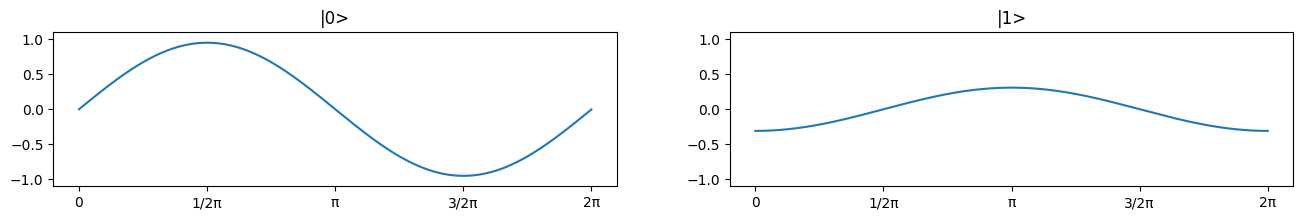

In [135]:
#q0の生成
qzero,qone = createBy1bit(Q1)
draw_2waves(qzero,qone)

In [131]:
#q1,q2の生成
q00,q01,q10,q11 = createBy2bit(Q2,Q3)

In [132]:
#q1にアダマールゲートを作用後、q2をターゲットビットとしてcxゲートを作用させる（Bell状態にする）
q00,q10 = h_gate(q00,q10)
q01,q11 = h_gate(q01,q11)
q00,q01,q10,q11 = cx_high_control(q00,q01,q10,q11)
#draw_4waves(q00,q01,q10,q11)

In [133]:
#q0をコントロールビット、q1をターゲットビットとしてCXゲートを作用させる
q000,q001,q010,q011,q100,q101,q110,q111 = merge1to2(q0,q1,q00,q01,q10,q11)
q000,q010,q100,q110 = cx_high_control(q000,q010,q100,q110)
q001,q011,q101,q111 = cx_high_control(q001,q011,q101,q111)
#draw_8waves(q000,q001,q010,q011,q100,q101,q110,q111)

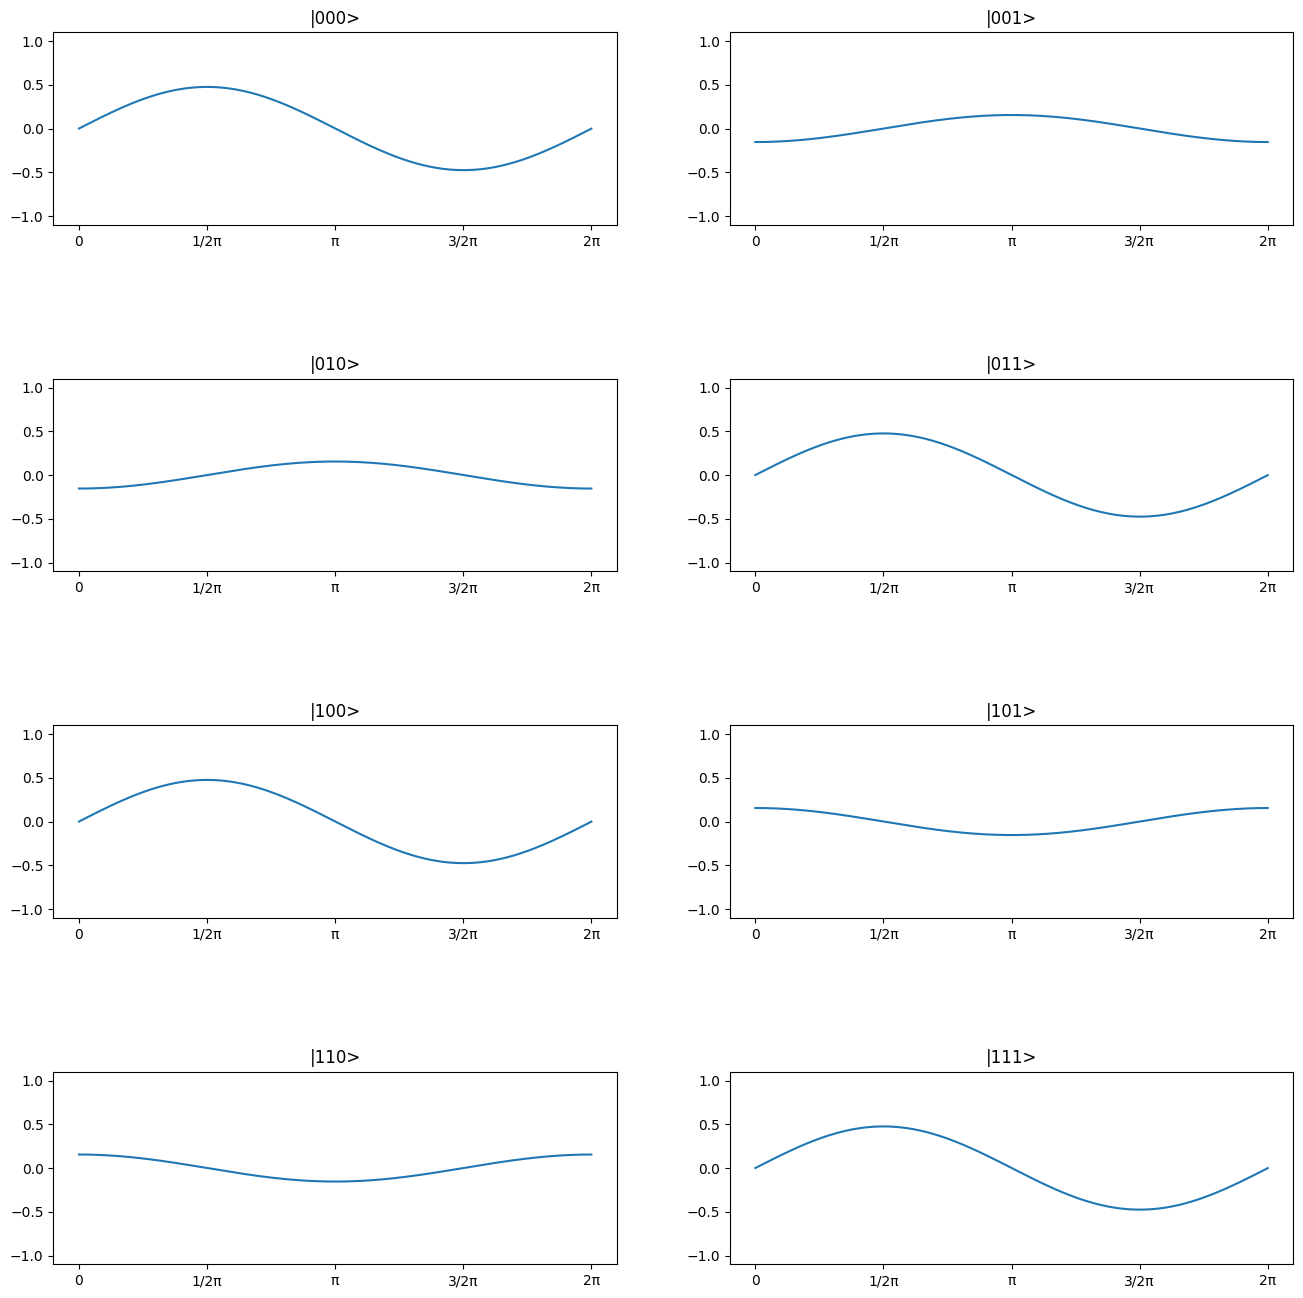

In [134]:
#q0にアダマールゲートを作用させる
q000,q100 = h_gate(q000,q100)
q001,q101 = h_gate(q001,q101)
q010,q110 = h_gate(q010,q110)
q011,q111 = h_gate(q011,q111)

#測定前の状態を描画
draw_8waves(q000,q001,q010,q011,q100,q101,q110,q111)

#print(max(q000)**2+max(q001)**2+max(q010)**2+max(q011)**2+max(q100)**2+max(q101)**2+max(q110)**2+max(q111)**2)